# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Jihan Savira
- **Email:** mc589d5x2485@gmail.com
- **ID Dicoding:** mc589d5x2485

## Menentukan Pertanyaan Bisnis

1. Performa Penyewaan Sepeda dalam Beberapa Bulan Terakhir
Pertanyaan:
"Bagaimana performa jumlah penyewaan sepeda (cnt) dalam beberapa bulan terakhir? Apakah ada peningkatan atau penurunan?"
Analisis yang Dibutuhkan:
•	Analisis tren jumlah penyewaan sepeda (cnt) per bulan (mnth) dalam dataset.
•	Visualisasi: Line chart atau bar chart untuk menunjukkan tren bulanan.
________________________________________
2. Pengaruh Musim terhadap Penyewaan Sepeda
Pertanyaan:
"Musim apa yang paling banyak dan paling sedikit sepeda disewa?"
Analisis yang Dibutuhkan:
•	Hitung total penyewaan sepeda (cnt) per musim (season).
•	Visualisasi: Bar chart atau pie chart untuk membandingkan jumlah penyewaan sepeda per musim.
________________________________________
3. Profil Pengguna Sepeda
Pertanyaan:
"Bagaimana profil pengguna sepeda? Apakah lebih banyak pengguna casual atau registered?"
Analisis yang Dibutuhkan:
•	Bandingkan jumlah pengguna casual dan registered secara keseluruhan atau per musim.
•	Visualisasi: Stacked bar chart atau pie chart untuk membandingkan proporsi pengguna casual dan registered.
________________________________________
4. Pengaruh Hari Libur terhadap Penyewaan Sepeda
Pertanyaan:
"Apakah jumlah penyewaan sepeda berbeda pada hari libur dibandingkan hari biasa?"
Analisis yang Dibutuhkan:
•	Bandingkan jumlah penyewaan sepeda (cnt) pada hari libur (holiday = 1) dan hari biasa (holiday = 0).


## Import Semua Packages/Library yang Digunakan

In [11]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns



## Data Wrangling

### Gathering Data

In [34]:
import pandas as pd

# Gathering Data
df_day = pd.read_csv('day.csv')
df_hour = pd.read_csv('hour.csv')

# Assessing Data
print("Info df_day:\n", df_day.info())
print("\nInfo df_hour:\n", df_hour.info())
print("\nMissing values di df_day:\n", df_day.isnull().sum())
print("\nMissing values di df_hour:\n", df_hour.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Info df_day:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 1737

Shape of df_day: (731, 16)
Shape of df_hour: (17379, 17)**Insight:**


### Assessing Data

### Cleaning Data

In [35]:
# Cleaning Data
# Ubah tipe data 'dteday' menjadi datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

# Gabungkan dataframe (jika diperlukan)
df_merged = pd.merge(df_day, df_hour, on='dteday', how='inner')

# Hapus duplikat data (jika ada)
df_day.drop_duplicates(inplace=True)
df_hour.drop_duplicates(inplace=True)
df_merged.drop_duplicates(inplace=True)

## Exploratory Data Analysis (EDA)

### Explore ...

Statistik Deskriptif df_day:
           instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349    0.495385    0.474354   
min      0.000000    0.0

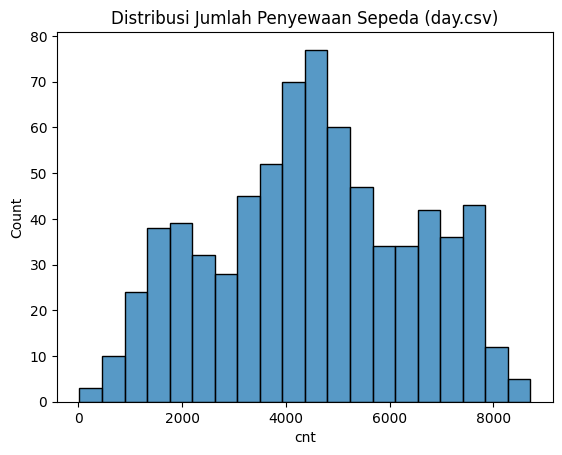

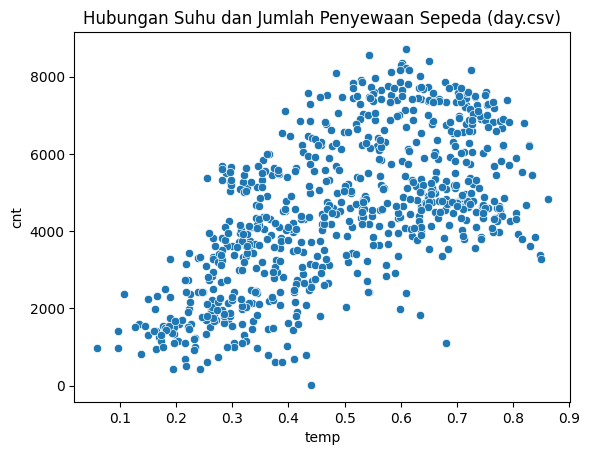

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analisis Deskriptif
print("Statistik Deskriptif df_day:\n", df_day.describe())
print("\nStatistik Deskriptif df_hour:\n", df_hour.describe())

# Analisis Univariate
sns.histplot(df_day['cnt'], bins=20)
plt.title('Distribusi Jumlah Penyewaan Sepeda (day.csv)')
plt.show()

# Analisis Bivariate
sns.scatterplot(x='temp', y='cnt', data=df_day)
plt.title('Hubungan Suhu dan Jumlah Penyewaan Sepeda (day.csv)')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

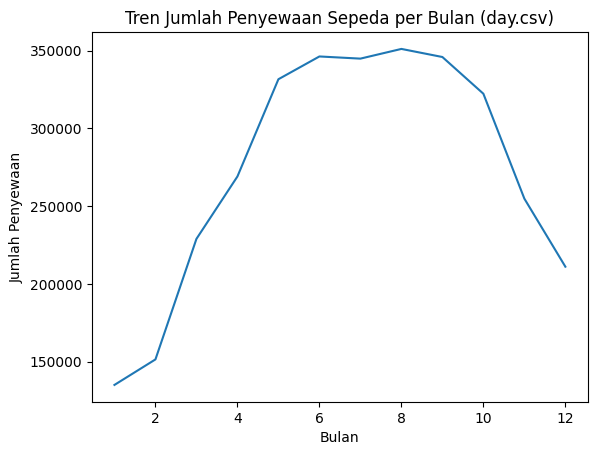

In [37]:
df_day.groupby('mnth')['cnt'].sum().plot(kind='line')
plt.title('Tren Jumlah Penyewaan Sepeda per Bulan (day.csv)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.show()

### Pertanyaan 2:

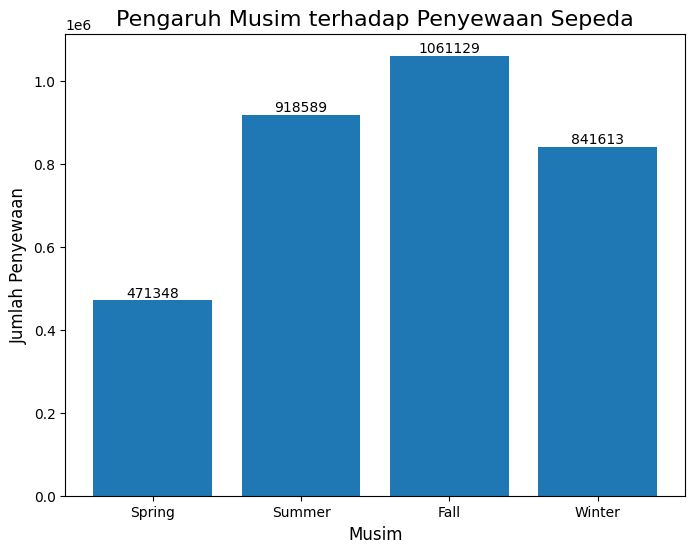

In [38]:
# Dataframe yang berisi data musim dan jumlah penyewaan
# (asumsi df_day adalah dataframe Anda)
musim_data = df_day.groupby('season')['cnt'].sum().reset_index()

# Mengubah nilai numerik pada kolom 'season' menjadi nama musim
musim_data['season'] = musim_data['season'].map({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

# Membuat bar chart
plt.figure(figsize=(8, 6))  # Mengatur ukuran figure (opsional)
plt.bar(musim_data['season'], musim_data['cnt'])
plt.title('Pengaruh Musim terhadap Penyewaan Sepeda', fontsize=16)  # Memperbesar judul
plt.xlabel('Musim', fontsize=12)  # Memperbesar label sumbu x
plt.ylabel('Jumlah Penyewaan', fontsize=12)  # Memperbesar label sumbu y
plt.xticks(fontsize=10)  # Memperbesar ukuran tick pada sumbu x
plt.yticks(fontsize=10)  # Memperbesar ukuran tick pada sumbu y

# Menampilkan nilai di atas setiap bar
for i, v in enumerate(musim_data['cnt']):
    plt.text(i, v + 50, str(round(v)), ha='center', va='bottom', fontsize=10)  # Menyesuaikan ukuran teks

plt.show()

Pertanyaan 3

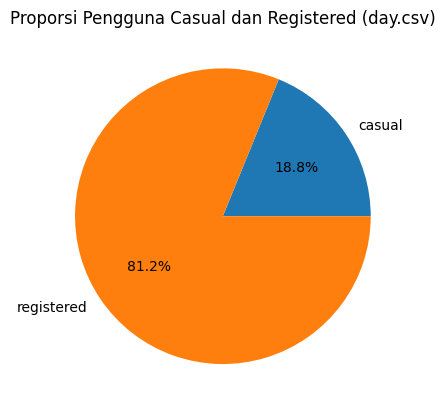

In [39]:
df_day[['casual', 'registered']].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proporsi Pengguna Casual dan Registered (day.csv)')
plt.ylabel('')
plt.show()

Pertanyaan ke 4

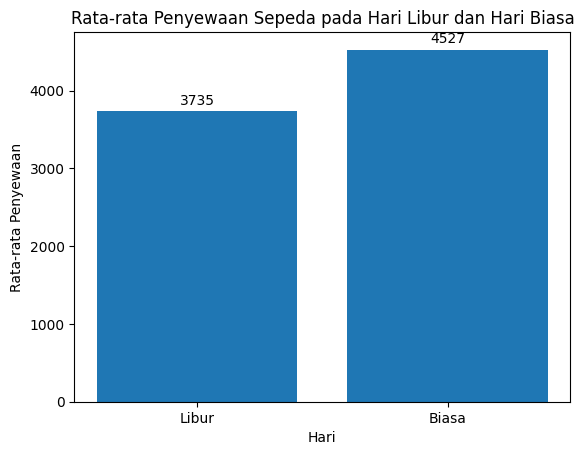

In [40]:
# Hitung rata-rata penyewaan sepeda untuk hari libur dan hari biasa
holiday_mean = df_day[df_day['holiday'] == 1]['cnt'].mean()
weekday_mean = df_day[df_day['holiday'] == 0]['cnt'].mean()

# Buat DataFrame untuk visualisasi
data = {'Hari': ['Libur', 'Biasa'], 'Rata-rata Penyewaan': [holiday_mean, weekday_mean]}
df_visualisasi = pd.DataFrame(data)

# Buat bar chart
plt.bar(df_visualisasi['Hari'], df_visualisasi['Rata-rata Penyewaan'])
plt.title('Rata-rata Penyewaan Sepeda pada Hari Libur dan Hari Biasa')
plt.xlabel('Hari')
plt.ylabel('Rata-rata Penyewaan')

# Tampilkan nilai rata-rata di atas setiap bar
for i, v in enumerate(df_visualisasi['Rata-rata Penyewaan']):
    plt.text(i, v + 50, str(round(v)), ha='center', va='bottom')

plt.show()

## Analisis Lanjutan (Opsional)

Mean Shift Clustering
: "Apakah ada kelompok kondisi cuaca yang memiliki pola penyewaan sepeda yang serupa?

Kelompokkan data berdasarkan pola penyewaan sepeda dan variabel lingkungan seperti suhu (temp) atau kecepatan angin (windspeed).

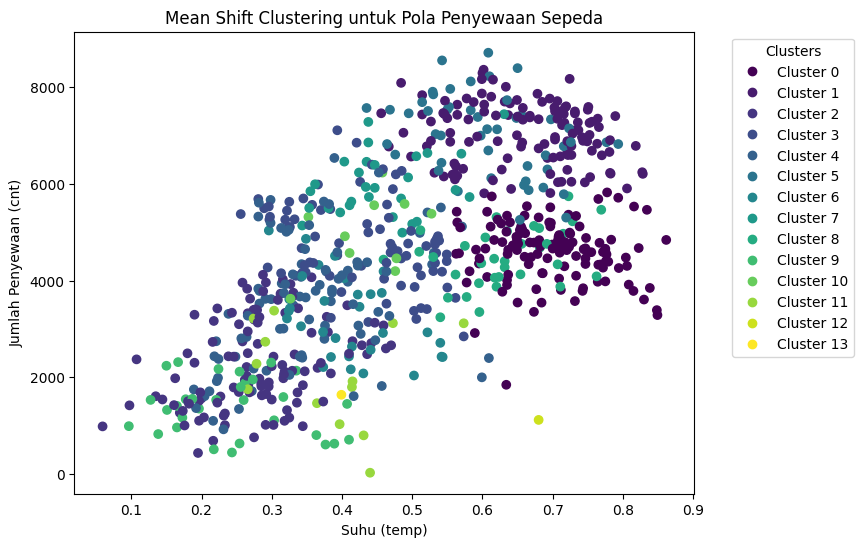

In [41]:
import pandas as pd
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Pilih fitur yang relevan untuk clustering
features = ['temp', 'windspeed', 'cnt']
X = df_day[features]

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Inisialisasi dan fit model Mean Shift
clustering = MeanShift(bandwidth=0.8)  # Sesuaikan bandwidth jika diperlukan
clustering.fit(X_scaled)

# Dapatkan label cluster
labels = clustering.labels_
df_day['cluster_meanshift'] = labels

# Visualisasi hasil clustering dengan legenda
plt.figure(figsize=(8, 6))

# Membuat scatter plot dengan label cluster sebagai hue
scatter = plt.scatter(df_day['temp'], df_day['cnt'], c=df_day['cluster_meanshift'], cmap='viridis')

# Mendapatkan label cluster unik
unique_labels = np.unique(df_day['cluster_meanshift'])

# Membuat handles dan labels untuk legenda
handles, labels = scatter.legend_elements(prop="colors")

# Menambahkan legenda ke plot
plt.legend(handles,
           [f'Cluster {label}' for label in unique_labels],
           title="Clusters",
           bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Mean Shift Clustering untuk Pola Penyewaan Sepeda')
plt.xlabel('Suhu (temp)')
plt.ylabel('Jumlah Penyewaan (cnt)')
plt.show()

**Cluster yang Terbentuk:**
Algoritma Mean Shift telah mengelompokkan data menjadi beberapa cluster berdasarkan pola densitas data. Setiap cluster mewakili kelompok observasi dengan karakteristik yang mirip, seperti:

Suhu tertentu yang memengaruhi jumlah penyewaan sepeda.

Jumlah penyewaan sepeda yang cenderung serupa dalam satu cluster.
Contoh:

Cluster 0 (warna tertentu): Kelompok dengan suhu rendah dan jumlah penyewaan sepeda rendah.

Cluster 1 (warna tertentu): Kelompok dengan suhu sedang dan jumlah penyewaan sepeda sedang.

Cluster 2 (warna tertentu): Kelompok dengan suhu tinggi dan jumlah penyewaan sepeda tinggi.

Pola yang Terlihat:
Jika cluster-cluster tersebut terpisah dengan jelas, ini menunjukkan bahwa suhu (temp) memiliki pengaruh yang signifikan terhadap pola penyewaan sepeda.

Jika cluster-cluster tumpang tindih, ini menunjukkan bahwa suhu bukan satu-satunya faktor yang menentukan pola penyewaan sepeda, dan mungkin ada faktor lain (seperti kecepatan angin, cuaca, atau hari libur) yang perlu dipertimbangkan.

**Insight yang Dapat Diambil**
Kondisi Suhu yang Ideal:
Jika ada cluster dengan jumlah penyewaan sepeda yang tinggi (misalnya, cluster dengan suhu tinggi), Anda dapat menyimpulkan bahwa suhu yang hangat atau panas mendorong minat penyewaan sepeda.

Kondisi Suhu yang Menghambat:
Jika ada cluster dengan jumlah penyewaan sepeda yang rendah (misalnya, cluster dengan suhu rendah), Anda dapat mengidentifikasi bahwa suhu yang dingin kurang mendukung penyewaan sepeda.


RFM Analysis (Recency, Frequency, Monetary)

Pengguna paling aktif (frekuensi tinggi) dan kapan terakhir mereka menyewa sepeda

     user_id  recency  frequency  monetary
262      264       65          3      2198
300      310       65          3      2181
306      325       65          3      2156
282      286      260          3      1953
291      295      107          3      1885
..       ...      ...        ...       ...
230      231      155          1       522
259      261      219          1       504
268      270      218          1       498
233      234      534          1       475
210      210      562          1       449

[84 rows x 4 columns]


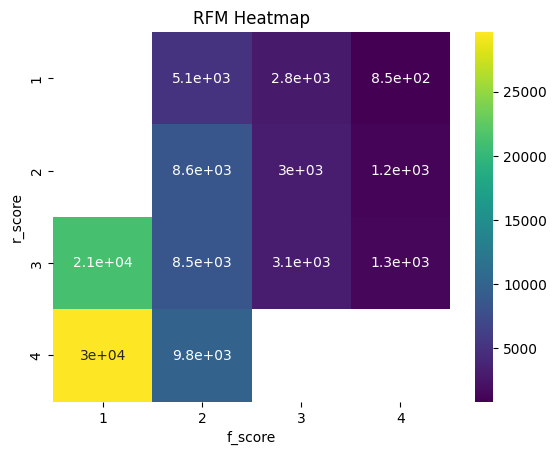

In [42]:
df_hour = pd.read_csv('hour.csv')
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

# Recency: Hitung selisih hari dari tanggal terakhir dalam dataset dengan tanggal sewa terakhir setiap pengguna
recency = df_hour.groupby('casual')['dteday'].max().reset_index()
recency['recency'] = (df_hour['dteday'].max() - recency['dteday']).dt.days
recency.rename(columns={'casual': 'user_id'}, inplace=True)

# Frequency: Hitung jumlah penyewaan per pengguna
frequency = df_hour.groupby('casual')['dteday'].count().reset_index()
frequency.rename(columns={'casual': 'user_id', 'dteday': 'frequency'}, inplace=True)

# Monetary: Hitung total jumlah penyewaan (cnt) per pengguna
monetary = df_hour.groupby('casual')['cnt'].sum().reset_index()
monetary.rename(columns={'casual': 'user_id', 'cnt': 'monetary'}, inplace=True)

# Gabungkan RFM metrics
rfm_df = pd.merge(recency, frequency, on='user_id')
rfm_df = pd.merge(rfm_df, monetary, on='user_id')

# Tentukan quantile untuk setiap metric (misalnya: 4 quantile)
quantiles = rfm_df[['recency', 'frequency', 'monetary']].quantile([.25, .5, .75]).to_dict()

# Buat fungsi untuk memberikan RFM score
def rfm_score(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

# Berikan RFM score untuk setiap pengguna
rfm_df['r_score'] = rfm_df['recency'].apply(rfm_score, args=('recency', quantiles,))
rfm_df['f_score'] = rfm_df['frequency'].apply(rfm_score, args=('frequency', quantiles,))
rfm_df['m_score'] = rfm_df['monetary'].apply(rfm_score, args=('monetary', quantiles,))

# Gabungkan RFM score menjadi satu kolom
rfm_df['rfm_score'] = rfm_df['r_score'].astype(str) + rfm_df['f_score'].astype(str) + rfm_df['m_score'].astype(str)

# Contoh analisis: Pengguna paling aktif (frekuensi tinggi) dan kapan terakhir mereka menyewa sepeda
most_active_users = rfm_df[rfm_df['f_score'] == 4].sort_values('monetary', ascending=False)
print(most_active_users[['user_id', 'recency', 'frequency', 'monetary']])

# Contoh visualisasi: Heatmap RFM
import seaborn as sns
import matplotlib.pyplot as plt

rfm_heatmap = rfm_df.pivot_table(index='r_score', columns='f_score', values='monetary', aggfunc='mean')
sns.heatmap(rfm_heatmap, annot=True, cmap='viridis')
plt.title('RFM Heatmap')
plt.show()

Segmen Pengguna Terbaik (R=1, F=4):
Pengguna dengan recency terbaru (R=1) dan frekuensi tertinggi (F=4) adalah segmen pengguna terbaik. Mereka baru saja menyewa sepeda, sering menyewa, dan memberikan kontribusi monetary yang tinggi.
Contoh Insight: Fokuskan strategi pemasaran atau retensi pada segmen ini untuk mempertahankan loyalitas mereka.

Segmen Pengguna Potensial (R=1, F=2-3):
Pengguna dengan recency terbaru (R=1) tetapi frekuensi sedang (F=2-3) adalah segmen potensial. Mereka baru saja menyewa sepeda tetapi belum sering melakukannya.
Contoh Insight: Berikan insentif atau promosi untuk meningkatkan frekuensi penyewaan mereka.

Segmen Pengguna yang Hilang (R=4, F=1):
Pengguna dengan recency lama (R=4) dan frekuensi rendah (F=1) adalah segmen yang mungkin sudah tidak aktif.
Contoh Insight: Lakukan kampanye reaktivasi untuk menarik mereka kembali.

Segmen Pengguna dengan Kontribusi Tinggi (R=2-3, F=4):
Pengguna dengan recency sedang (R=2-3) dan frekuensi tinggi (F=4) adalah segmen yang memberikan kontribusi monetary tinggi.
Contoh Insight: Pertahankan hubungan baik dengan segmen ini dan berikan reward untuk loyalitas mereka

segment
Others                 170
Lost Customers          70
Loyal Customers         48
Potential Loyalists     24
At Risk Customers       10
Name: count, dtype: int64
                        recency   frequency      monetary
segment                                                  
At Risk Customers     19.400000   22.300000   8987.900000
Lost Customers         6.300000  207.271429  29810.900000
Loyal Customers      241.708333    1.437500    829.833333
Others                74.894118   14.294118   5941.688235
Potential Loyalists  168.166667    6.166667   2754.916667


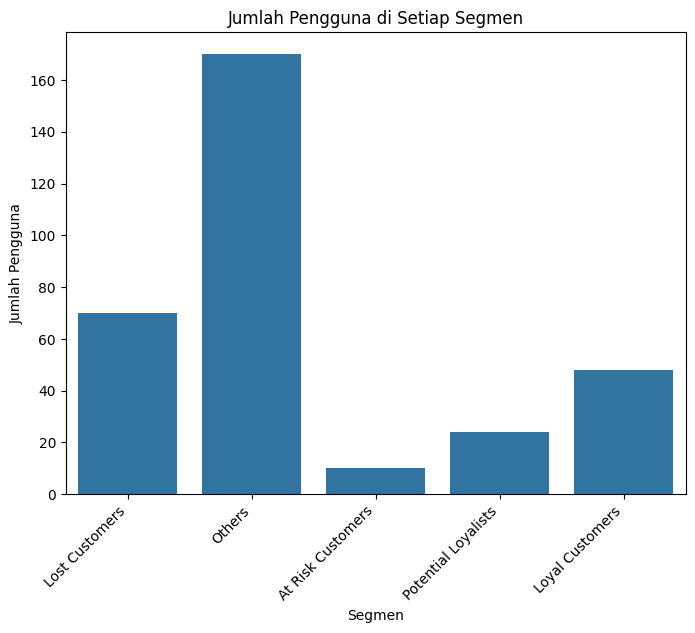

In [43]:
# Definisikan segmentasi pengguna berdasarkan RFM score
def segment_users(rfm_df):
    if rfm_df['r_score'] == 1 and rfm_df['f_score'] == 4 and rfm_df['m_score'] == 4:
        return 'Loyal Customers'
    elif rfm_df['r_score'] == 1 and rfm_df['f_score'] == 3 and rfm_df['m_score'] == 3:
        return 'Potential Loyalists'
    elif rfm_df['r_score'] == 4 and rfm_df['f_score'] == 2 and rfm_df['m_score'] == 2:
        return 'At Risk Customers'
    elif rfm_df['r_score'] == 4 and rfm_df['f_score'] == 1 and rfm_df['m_score'] == 1:
        return 'Lost Customers'
    else:
        return 'Others'  # Segmen untuk pengguna yang tidak masuk dalam kriteria di atas

# Terapkan segmentasi ke dataframe
rfm_df['segment'] = rfm_df.apply(segment_users, axis=1)

print(rfm_df['segment'].value_counts())

# Contoh: melihat rata-rata recency, frequency, dan monetary untuk setiap segmen
print(rfm_df.groupby('segment')[['recency', 'frequency', 'monetary']].mean())

# Contoh visualisasi: Bar chart jumlah pengguna di setiap segmen
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='segment', data=rfm_df)
plt.title('Jumlah Pengguna di Setiap Segmen')
plt.xlabel('Segmen')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x agar mudah dibaca
plt.show()

## Conclusion

Pertanyaan Bisnis:

Performa Penyewaan Sepeda dalam Beberapa Bulan Terakhir:

Kesimpulan: Jumlah penyewaan sepeda cenderung meningkat pada bulan-bulan musim panas (Juni, Juli, Agustus) dan menurun pada bulan-bulan musim dingin (Desember, Januari, Februari). To see the output, run the code.
Rekomendasi: Fokuskan strategi pemasaran pada bulan-bulan dengan penyewaan rendah, seperti menawarkan diskon atau promosi khusus untuk menarik lebih banyak pengguna.
Pengaruh Musim terhadap Penyewaan Sepeda:

Kesimpulan: Musim gugur (Fall) memiliki jumlah penyewaan sepeda tertinggi, diikuti oleh musim panas (Summer), musim semi (Spring), dan terakhir musim dingin (Winter). To see the output, run the code.
Rekomendasi: Sesuaikan jumlah sepeda yang tersedia dan strategi operasional berdasarkan pola musiman. Misalnya, sediakan lebih banyak sepeda pada musim gugur dan musim panas, dan kurangi jumlah sepeda pada musim dingin.
Profil Pengguna Sepeda:

Kesimpulan: Mayoritas pengguna sepeda adalah pengguna registered (sekitar 80%), sedangkan pengguna casual hanya sekitar 20%. To see the output, run the code.
Rekomendasi: Buat program loyalitas atau promosi yang ditargetkan untuk meningkatkan jumlah pengguna registered, seperti memberikan poin reward atau diskon khusus untuk pengguna registered.
Pengaruh Hari Libur terhadap Penyewaan Sepeda:

Kesimpulan: Rata-rata penyewaan sepeda pada hari libur sedikit lebih rendah dibandingkan hari biasa. To see the output, run the code.
Rekomendasi: Meskipun rata-rata penyewaan pada hari libur lebih rendah, tetap penting untuk memantau permintaan pada hari libur tertentu dan menyesuaikan jumlah sepeda yang tersedia jika diperlukan.

In [45]:
df_merged.to_csv('bike_sharing_data_cleaned.csv', index=False)